In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 !unzip -q "//content//drive//MyDrive//Project Dataset//Updated Gem Images.zip" -d "/content/data"

In [35]:
!unzip -q "/content/drive/MyDrive/Project Dataset/Non Gem objects.zip" -d "/content/data"

In [ ]:
import tensorflow as tf
# Instead of:
# from keras.preprocessing.image import ImageDataGenerator
# Use:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import pathlib
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
# !pip install unrar
# !unrar x '//content//drive//MyDrive//Colab Notebooks//bb.rar' -d "//content//drive//MyDrive//Colab Notebooks//"

In [40]:
train_path_to_images = "//content//data//Real Gems//"
# train_path_to_images2 = "//content//data//Non Gems//"
# val_path_to_images = '//content//drive//MyDrive//Colab Notebooks//Face_Dataset//val//'

In [41]:
train_data_dir = pathlib.Path(train_path_to_images)

train_class_names = np.array(sorted([item.name for item in train_data_dir.glob('*')]))
print(len(train_class_names))
print(train_class_names)

# train_data_dir2 = pathlib.Path(train_path_to_images2)
# train_class_names2 = np.array(sorted([item.name for item in train_data_dir2.glob('*')]))
# print(len(train_class_names2))
# print(train_class_names2)

# val_data_dir = pathlib.Path(val_path_to_images)
# val_class_names = np.array(sorted([item.name for item in val_data_dir.glob('*')]))
# print(len(val_class_names))
# print(val_class_names)

5
['Blue Sapphires' 'CatsEye' 'Pink Sapphires' 'Topaz' 'Yellow Sapphires']
4
['Coins' 'Marbal' 'Pen' 'Stons']


In [ ]:
train_num_img_class = []
for class_name in train_class_names:

  path_to_class = train_path_to_images + class_name
  class_dir = pathlib.Path(path_to_class)
  train_num_img_class.append(len([item.name for item in class_dir.glob('*')]))


# val_num_img_class = []
# for class_name in val_class_names:

#   path_to_class = val_path_to_images + class_name
#   class_dir = pathlib.Path(path_to_class)
#   val_num_img_class.append(len([item.name for item in class_dir.glob('*')]))

In [ ]:
arg_sorted_class_img_by_len_train = np.argsort(np.array(train_num_img_class))
# arg_sorted_class_img_by_len_val = np.argsort(np.array(val_num_img_class))

In [ ]:
for i in arg_sorted_class_img_by_len_train:
  print(f'{train_num_img_class[i]:5} {train_class_names[i]}')

# for i in arg_sorted_class_img_by_len_val:
#   print(f'{val_num_img_class[i]:5} {val_class_names[i]}')

   73 CatsEye
  103 Topaz
  153 Pink Sapphires
  198 Yellow Sapphires
  291 Blue Sapphires


In [ ]:
def view_random_images(target_dir, target_class):

    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    img = mpimg.imread(target_folder+ '//' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    plt.show()

    print(f'image shape : {img.shape}')

['IMG_8931.JPG']


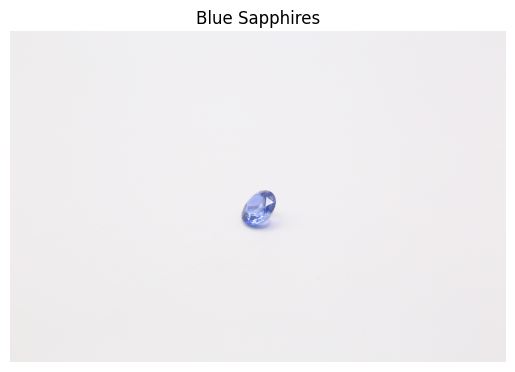

image shape : (3648, 5472, 3)
['IMG_9040.JPG']


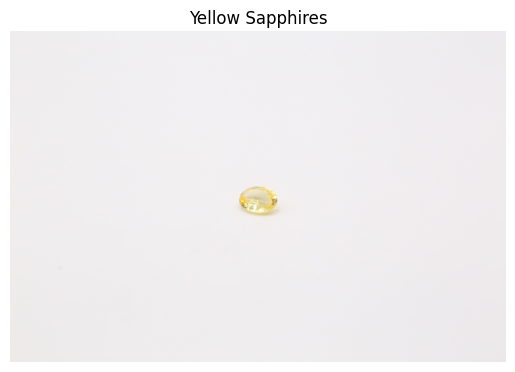

image shape : (3648, 5472, 3)


In [ ]:
view_random_images(target_dir= train_path_to_images, target_class='Blue Sapphires')
view_random_images(target_dir= train_path_to_images, target_class='Yellow Sapphires')

In [ ]:
# !pip3 install keras== 2.1.2
# from keras.preprocessing.image import ImageDataGenerator

In [42]:
datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True
        )
train_data_set = datagen.flow_from_directory(
        train_data_dir,
        target_size=(255, 255),
        batch_size=32,
        shuffle=True,
        class_mode='categorical')

# train_data_set2 = datagen.flow_from_directory(
#         train_data_dir2,
#         target_size=(255, 255),
#         batch_size=32,
#         shuffle=True,
#         class_mode='categorical')

# val_data_set = datagen.flow_from_directory(
#         val_data_dir,
#         target_size=(255, 255),
#         batch_size=32,
#         shuffle=True,
#         class_mode='categorical')

Found 818 images belonging to 5 classes.
Found 120 images belonging to 4 classes.


In [4]:
# !pip install keras-cv

In [46]:
# !pip install mrcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54907 sha256=2101871d7a634fef034e23421491d50d2855b7c79ca98bd773acbdd819bd37c5
  Stored in directory: /root/.cache/pip/wheels/f6/66/35/4956a489776a1db0ee24e0c33a9088c1b5d68eb5dc2654f0b2
Successfully built mrcnn


In [3]:
# import os
# import numpy as np
# import cv2
# import tensorflow as tf
# from imgaug import augmenters as iaa
# import matplotlib.pyplot as plt

# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from mrcnn.config import Config
# from mrcnn import model as modellib, utils
# from tensorflow import keras

# # Custom Mask R-CNN Configuration
# class MaskRCNNConfig(Config):
#     NAME = "mask_rcnn_classification"
#     IMAGES_PER_GPU = 2
#     NUM_CLASSES = 1 + 7  # Background + 7 classes
#     STEPS_PER_EPOCH = 100
#     DETECTION_MIN_CONFIDENCE = 0.9
#     IMAGE_MIN_DIM = 512
#     IMAGE_MAX_DIM = 512

# # Dataset Preparation Class
# class ImageDataset(utils.Dataset):
#     def load_dataset(self, dataset_dir):
#         for i, folder in enumerate(sorted(os.listdir(dataset_dir))):
#             class_name = folder
#             self.add_class("dataset", i + 1, class_name)
#             folder_path = os.path.join(dataset_dir, folder)
#             for filename in os.listdir(folder_path):
#                 image_path = os.path.join(folder_path, filename)
#                 self.add_image("dataset", image_id=filename, path=image_path, class_id=i + 1)

#     def load_mask(self, image_id):
#         # Implement mask creation based on the annotation style.
#         info = self.image_info[image_id]
#         mask = np.ones([info['height'], info['width']], dtype=np.bool)  # Dummy mask
#         class_ids = np.array([info['class_id']])
#         return mask, class_ids.astype(np.int32)

#     def image_reference(self, image_id):
#         return self.image_info[image_id]["path"]

# # Load Dataset
# dataset_dir = train_data_dir2
# train_dataset = ImageDataset()
# train_dataset.load_dataset(dataset_dir)
# train_dataset.prepare()

# # Model Setup
# config = MaskRCNNConfig()
# model = modellib.MaskRCNN(mode="training", config=config, model_dir="./logs")

# # Pretrained Weights
# weights_path = tf.keras.utils.get_file(
#     "mask_rcnn_coco.h5",
#     "https://github.com/matterport/Mask_RCNN/releases/download/v2.1/mask_rcnn_coco.h5"
# )
# model.load_weights(weights_path, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

# # Data Augmentation
# augmentation = iaa.Sequential([
#     iaa.Fliplr(0.5),
#     iaa.Flipud(0.2),
#     iaa.Affine(rotate=(-10, 10))
# ])

# # Training the Model
# model.train(train_dataset, train_dataset,
#             learning_rate=config.LEARNING_RATE,
#             epochs=10,
#             layers='heads',
#             augmentation=augmentation)

# print("Training Complete.")

In [ ]:
def create_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation="relu", input_shape=(255, 255, 3)),
    tf.keras.layers.MaxPool2D(pool_size=5),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=2, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation="softmax")
  ])

  model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=["accuracy"])

  return model

In [21]:
cnn = create_model()

history = cnn.fit(train_data_set,epochs=55)

#device_name = tf.test.gpu_device_name()
#print('Found GPU at: {}'.format(device_name))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/55


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 232s 7s/step - accuracy: 0.3615 - loss: 1.5334
Epoch 2/55
26/26 ━━━━━━━━━━━━━━━━━━━━ 269s 8s/step - accuracy: 0.3399 - loss: 1.4813
Epoch 3/55
26/26 ━━━━━━━━━━━━━━━━━━━━ 247s 7s/step - accuracy: 0.5536 - loss: 1.1905
Epoch 4/55
26/26 ━━━━━━━━━━━━━━━━━━━━ 216s 7s/step - accuracy: 0.6546 - loss: 0.8093
Epoch 5/55
26/26 ━━━━━━━━━━━━━━━━━━━━ 280s 7s/step - accuracy: 0.7180 - loss: 0.7208
Epoch 6/55
26/26 ━━━━━━━━━━━━━━━━━━━━ 256s 7s/step - accuracy: 0.7526 - loss: 0.5999
Epoch 7/55
26/26 ━━━━━━━━━━━━━━━━━━━━ 256s 7s/step - accuracy: 0.7385 - loss: 0.6638
Epoch 8/55
26/26 ━━━━━━━━━━━━━━━━━━━━ 229s 7s/step - accuracy: 0.8578 - loss: 0.4568
Epoch 9/55
26/26 ━━━━━━━━━━━━━━━━━━━━ 263s 7s/step - accuracy: 0.8681 - loss: 0.3794
Epoch 10/55
26/26 ━━━━━━━━━━━━━━━━━━━━ 231s 7s/step - accuracy: 0.9076 - loss: 0.2864
Epoch 11/55
26/26 ━━━━━━━━━━━━━━━━━━━━ 221s 7s/step - accuracy: 0.9230 - loss: 0.2313
Epoch 12/55
26/26 ━━━━━━━━━━━━━━━━━━━━ 230s 7s/step - accuracy: 0.9331 - l

In [22]:
# with tf.device('/device:GPU:0'):
#   history = cnn.fit(train_data_set,epochs=55)

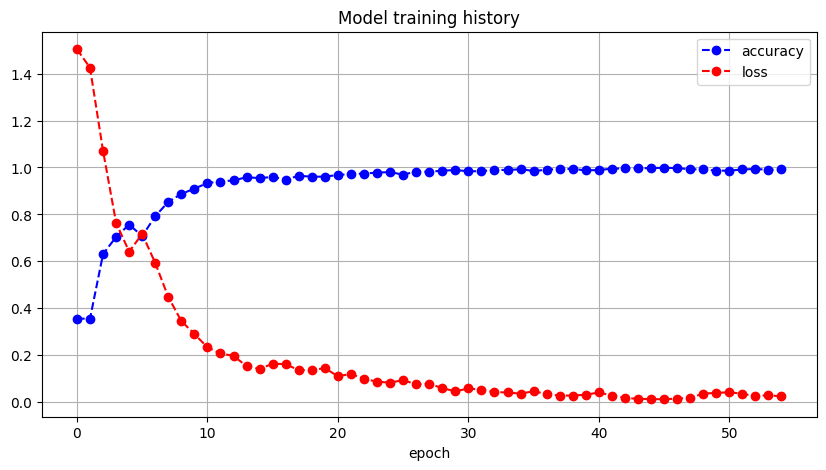

In [23]:
import pandas as pd

fig, ax = plt.subplots(1, figsize=(10,5))
ax.plot(history.epoch, history.history['accuracy'], 'b--o', label='accuracy')
ax.plot(history.epoch, history.history['loss'], 'r--o',label='loss')

ax.legend()
ax.grid()

ax.set_xlabel('epoch')
ax.set_ylabel('')

ax.set_title('Model training history')
plt.show()

In [24]:
cnn.save('//content//gems.h5')

In [25]:
model = create_model()
model.load_weights('//content//gems.h5')

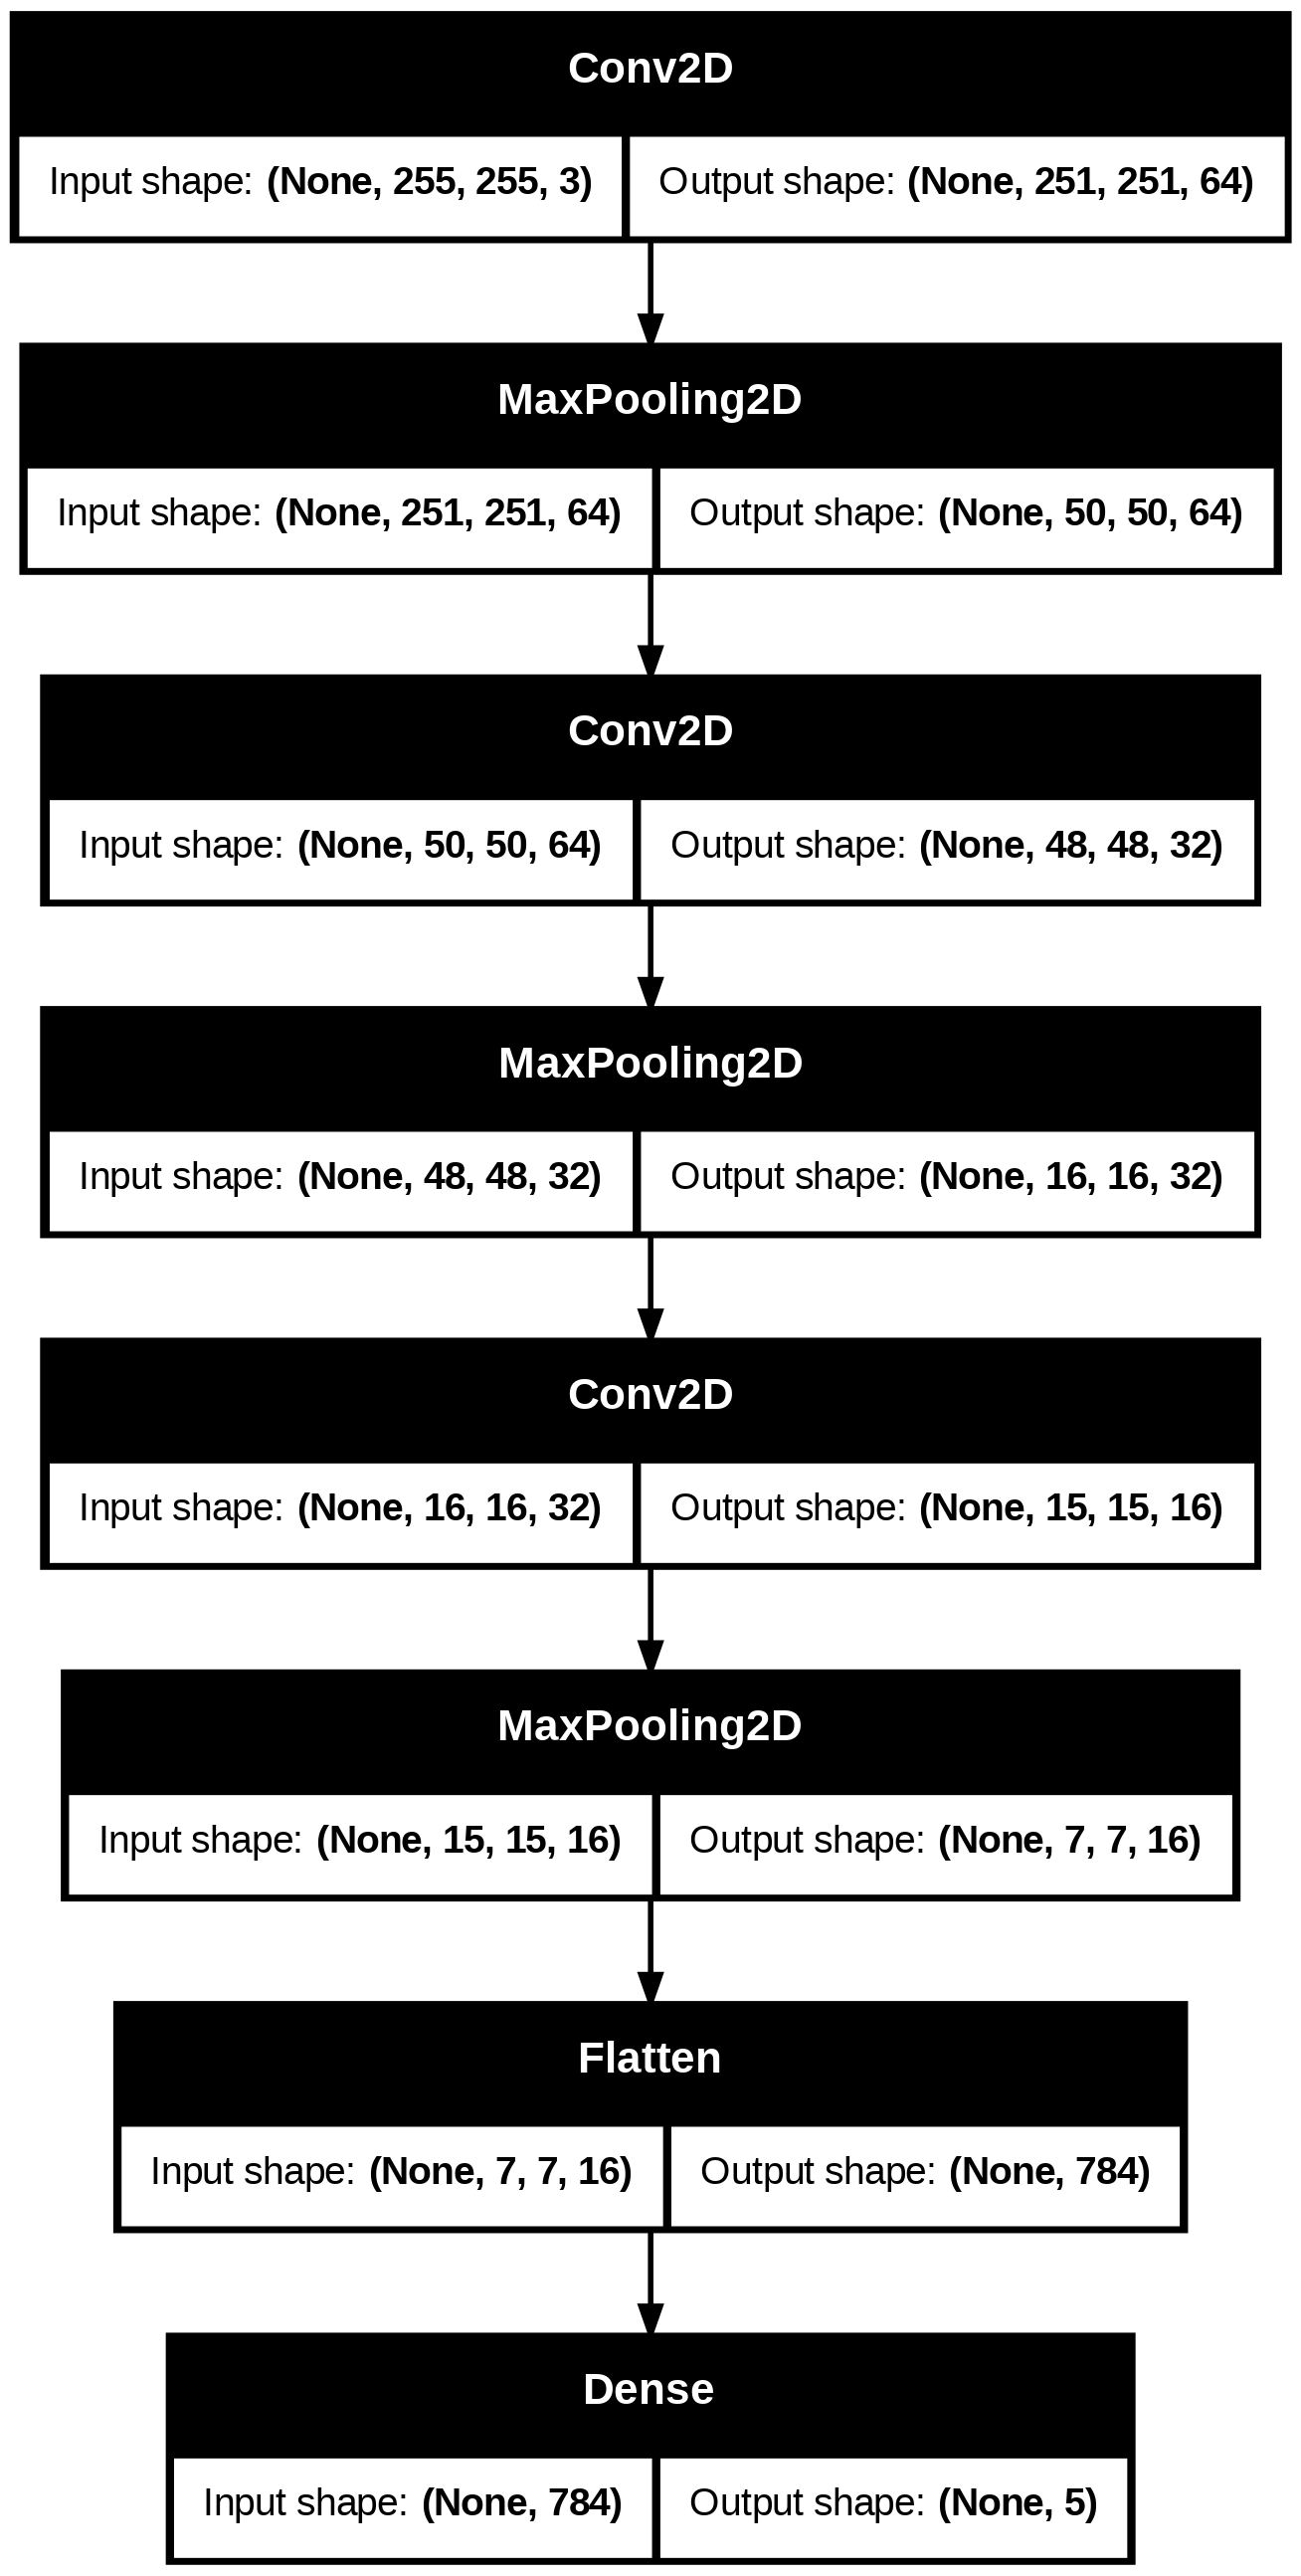

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 251, 251, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 48, 48, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 15, 15, 16)          │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           3,925 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,317 (114.52 KB)

 Trainable params: 29,317 (114.52 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
img_paths = train_data_set.filenames
predictions = []

for img_path in img_paths:

  full_path_to_img = train_path_to_images + img_path
  img = tf.keras.utils.load_img(
      full_path_to_img,color_mode='rgb', target_size=[255, 255],
      interpolation='nearest'
  )
  input_arr = tf.keras.preprocessing.image.img_to_array(img)
  input_arr = np.array([input_arr])  # Convert single image to a batch.
  input_arr = input_arr / 255
  predictions.append(np.argmax(model.predict(input_arr)))

true_labels = train_data_set.labels

error_label_count = 0

for i in range(len(true_labels)):
  if true_labels[i] != predictions[i]:
    error_label_count+=1


train_accuracy = 100*(1-(error_label_count/len(true_labels)))
print("Train accuracy: {:5.2f}%".format(train_accuracy))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━

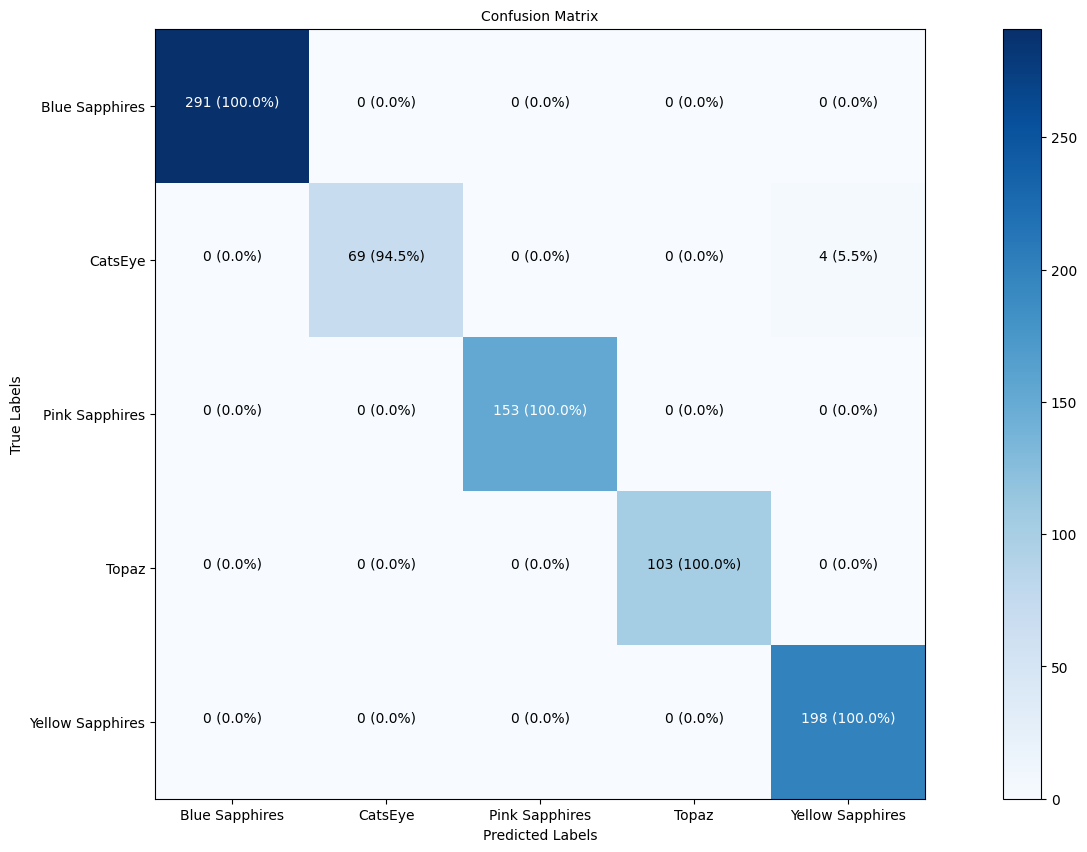

In [30]:
def displayConfusionMatrix(y_true, y_pred, classes=None, text_size=10, figsize = (20, 10)):

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(
        title='Confusion Matrix',
        xlabel='Predicted Labels',
        ylabel='True Labels',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels,
        )

    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) / 2.0

    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
        horizontalalignment='center',
        color='white' if cm[i, j] > threshold else 'black',
        size=text_size)


displayConfusionMatrix(train_data_set.labels, predictions, ['Blue Sapphires', 'CatsEye', 'Pink Sapphires' ,'Topaz', 'Yellow Sapphires'])

In [34]:
def prediction_probability_label(model, img_path, class_labels, is_rgb=True)->tuple:
  if is_rgb:
    img = tf.keras.utils.load_img(
                img_path, color_mode='rgb', target_size=[255, 255],
                interpolation='nearest'
            )
  else:
            img = tf.keras.utils.load_img(
                img_path, color_mode='grayscale', target_size=[255, 255],
                interpolation='nearest'
            )
  input_arr = tf.keras.preprocessing.image.img_to_array(img)
  input_arr = np.array([input_arr])  # Convert single image to a batch.
  input_arr = input_arr / 255
  pred_probs = model.predict(input_arr)[0]
  pred_class = np.argmax(pred_probs)
  pred_label = class_labels[pred_class]
  pred_prob = round(pred_probs[pred_class]*100, 2)
  # img = cv2.imread(img_path)
  print(pred_label,pred_prob)

newmodel = tf.keras.models.load_model("/content/gems.h5")
img_path = "/content/data/Real Gems/Topaz/IMG_8684.JPG"
class_labels = ['Blue Sapphires', 'CatsEye', 'Pink Sapphires' ,'Topaz', 'Yellow Sapphires']

prediction_probability_label(newmodel, img_path, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Topaz 99.78
